In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# 1) RATE EQUATIONS

### a) first-order reactions

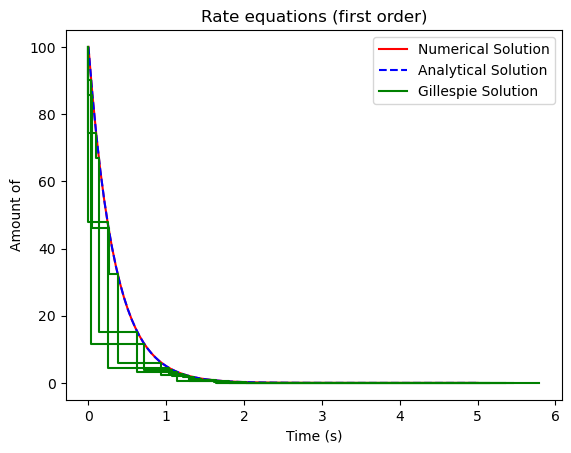

In [6]:
# DEFINING VARIABLES
A0 = 100  # initial amount
t_span = (0, 5) # from t=0 to t=5
t_eval = np.linspace(0, 5, 100)
k = 3  # decay rate per second



# SOLVING NUMERICALLY
def f(t, A, k):  # t is the independent variable, A is the dependent variable, and k is the constant
    return -k * A
sol = solve_ivp(f, t_span, [A0], args=(k,), t_eval=t_eval, dense_output= True)

plt.plot(sol.t, sol.y[0], label='Numerical Solution', color='red')


# SOLVING ANALYTICALLY 
def analytical_solution(t, A0, k):
    return A0 * np.exp(-k * t)

analytical_values = analytical_solution(t_eval, A0, k)

plt.plot(t_eval, analytical_values, label='Analytical Solution', linestyle='dashed', color='blue')

# SOLVING USING Gillespie (stochastic)
def gillespie_decay(A0, k, t_span, seed=None):
    time_points = [t_span[0]]
    amounts = [A0]

    while time_points[-1] < t_span[1]:
        dt = np.random.exponential(scale=1/k)
        time_points.append(time_points[-1] + dt)
        amounts.append(amounts[-1] * np.exp(-k * dt))

    return np.array(time_points), np.array(amounts)

SEED_1=10
gillespie_time_S1, gillespie_values_S1 = gillespie_decay(A0, k, t_span, seed=SEED_1)

SEED_2=25
gillespie_time_S2, gillespie_values_S2 = gillespie_decay(A0, k, t_span, seed=SEED_2)

SEED_3=75
gillespie_time_S3, gillespie_values_S3 = gillespie_decay(A0, k, t_span, seed=SEED_3)

SEED_4=125
gillespie_time_S4, gillespie_values_S4 = gillespie_decay(A0, k, t_span, seed=SEED_4)


plt.step(gillespie_time_S1, gillespie_values_S1, label='Gillespie Solution', color='green')
plt.step(gillespie_time_S2, gillespie_values_S2, color='green')
plt.step(gillespie_time_S3, gillespie_values_S3, color='green')
plt.step(gillespie_time_S4, gillespie_values_S4, color='green')



# PLOTTING
plt.xlabel('Time (s)')
plt.ylabel('Amount of')
plt.title('Rate equations (first order)')
plt.legend()
plt.show()

### b) Second order reactions

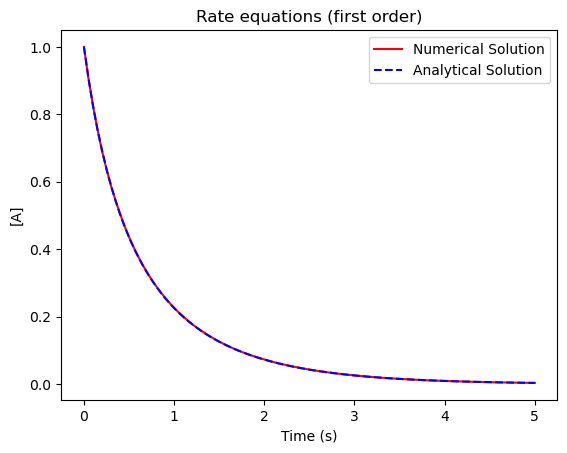

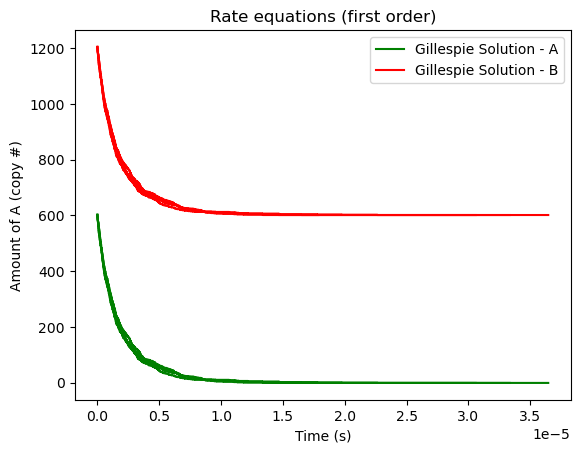

In [25]:
# DEFINING VARIABLES
A0 = 1  # initial amount (microM)
B0 = 2
t_span = (0, 5) # from t=0 to t=5
t_eval = np.linspace(0, 5, 100)
k = 1  # decay rate per second (microM/s)


# SOLVING NUMERICALLY
def num_fun(t, A, B0, A0, k):  # t is the independent variable, A is the dependent variable, and k, A0, and B0 are constants
    return -k * A * (B0 - A0 + A)

sol = solve_ivp(num_fun, t_span, [A0], args=(B0,A0,k), t_eval=t_eval, dense_output= True)

plt.plot(sol.t, sol.y[0], label='Numerical Solution', color='red')

# SOLVING ANALYTICALLY 
def analytical_solution(t, A0, B0, k):
    #return B0 - A0 - ((B0 - 2*A0) * np.exp(-k * t))
    return (A0* np.exp((A0 - B0)*k*t)*(1-(A0/B0))) / (1 - (A0/B0)*np.exp((A0-B0)*k*t))

analytical_values = analytical_solution(t_eval, A0, B0, k)

plt.plot(t_eval, analytical_values, label='Analytical Solution', linestyle='dashed', color='blue')

plt.xlabel('Time (s)')
plt.ylabel('[A]')
plt.title('Rate equations (first order)')
plt.legend()
plt.show()




# SOLVING USING Gillespie (stochastic)

## must put in units of copy numbers, not concentrations - I am using a volume of 1um^3
A02 = 602.3 # conversion: um/L * avagadros#/umol = copy#/L * L/10^15um^3 = avagadros#/um^3 = 602.3
B02 = 1204.6
k2 = 602.3
t_span = (0, 5) #from t=0 to t=5
V = 1  # volume in um^3

# Define the Gillespie function
def gillespie_AB(A02, B02, k2, V, t_span, seed=None):
    time_points = [t_span[0]]
    amounts_A = [A02]
    amounts_B = [B02]

    while time_points[-1] < t_span[1] and amounts_A[-1] > 0 and amounts_B[-1] > 0:
        a = k2 * amounts_A[-1] * amounts_B[-1] / V #reaction propensity
        tau = -np.log(np.random.uniform()) / a #time interval
        time_points.append(time_points[-1] + tau)
        amounts_A.append(amounts_A[-1] - 1) 
        amounts_B.append(amounts_B[-1] - 1) 

    return np.array(time_points), np.array(amounts_A), np.array(amounts_B)


SEED_1=10
gillespie_time_S1_2, gillespie_Avalues_S1_2, gillespie_Bvalues_S1_2 = gillespie_AB(A02, B02, k2, V, t_span, seed=SEED_1)

SEED_2=25
gillespie_time_S2_2, gillespie_Avalues_S2_2, gillespie_Bvalues_S2_2 = gillespie_AB(A02, B02, k2, V, t_span, seed=SEED_2)

SEED_3=75
gillespie_time_S3_2, gillespie_Avalues_S3_2, gillespie_Bvalues_S3_2 = gillespie_AB(A02, B02, k2, V, t_span, seed=SEED_3)

SEED_4=125
gillespie_time_S4_2, gillespie_Avalues_S4_2, gillespie_Bvalues_S4_2 = gillespie_AB(A02, B02, k2, V, t_span, seed=SEED_4)


plt.step(gillespie_time_S1_2, gillespie_Avalues_S1_2, label='Gillespie Solution - A', color='green')
plt.step(gillespie_time_S2_2, gillespie_Avalues_S2_2, color='green')
plt.step(gillespie_time_S3_2, gillespie_Avalues_S3_2, color='green')
plt.step(gillespie_time_S4_2, gillespie_Avalues_S4_2, color='green')

plt.step(gillespie_time_S1_2, gillespie_Bvalues_S1_2, label='Gillespie Solution - B', color='red')
plt.step(gillespie_time_S2_2, gillespie_Bvalues_S2_2, color='red')
plt.step(gillespie_time_S3_2, gillespie_Bvalues_S3_2, color='red')
plt.step(gillespie_time_S4_2, gillespie_Bvalues_S4_2, color='red')


# PLOTTING
plt.xlabel('Time (s)')
plt.ylabel('Amount of A (copy #)')
plt.title('Rate equations (first order)')
plt.legend()
plt.show()

# 2) Brownian Motion

### a) Sampling random numbers

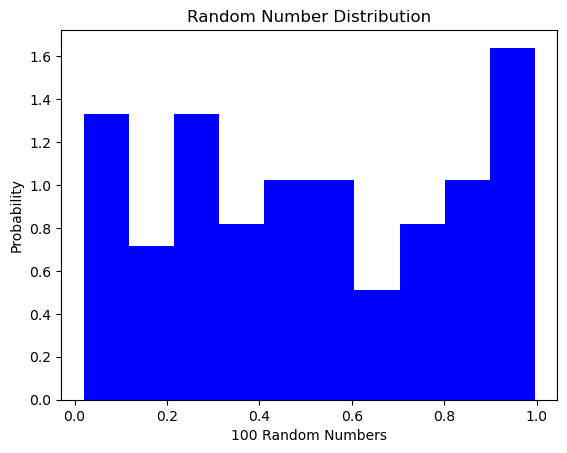

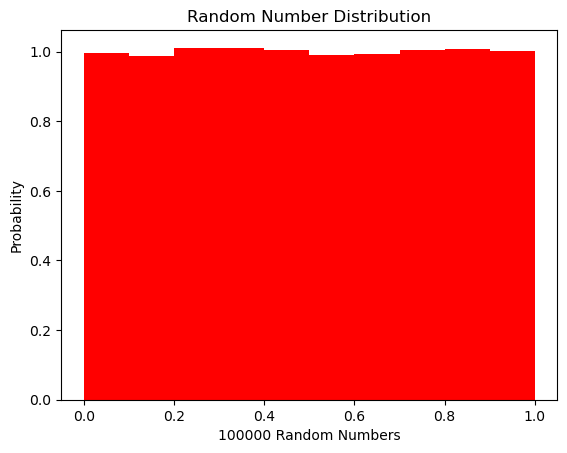

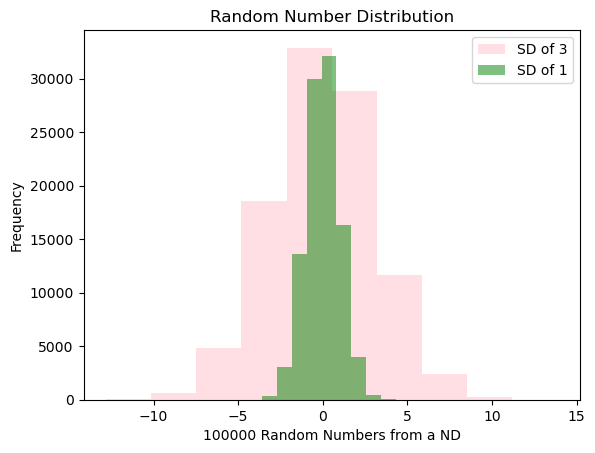

In [65]:
rand100 = np.random.rand(100)

plt.hist(rand100, bins=10, density=True, color = 'blue')
plt.xlabel('100 Random Numbers')
plt.ylabel('Probability')
plt.title('Random Number Distribution')
plt.show()


rand100000 = np.random.rand(100000)

plt.hist(rand100000, bins=10, density=True, color = 'red')
plt.xlabel('100000 Random Numbers')
plt.ylabel('Probability')
plt.title('Random Number Distribution')
plt.show()


rand100000_ND = np.random.normal(0,1,100000)
rand100000_ST3 = np.random.normal(0,3,100000) #mean of 0, SD of 3, and want 100000 numbers

plt.hist(rand100000_ST3, alpha=0.5, color= 'pink', label = 'SD of 3')
plt.hist(rand100000_ND, alpha=0.5, color = 'green', label= 'SD of 1')
plt.xlabel('100000 Random Numbers from a ND')
plt.ylabel('Frequency')
plt.legend()
plt.title('Random Number Distribution')
plt.show()

### b) Simulate hopping process and trajectories

In [85]:
# Starting particle off at x=0, and a lattice where a=1
x = 0

# Probability of moves
k = 4 #1/s
dt = 0.1 #second

pLeft = k*dt
pRight = k*dt
pStay = 1 - (2*k*dt)

N = 100
current_step = 0
position = []

while current_step < N:
    position.append(x)

    move = np.random.rand()
    
    if move < pLeft:
        x -= 1
    elif move < pLeft + pStay:
        pass
    else:
        x += 1

    current_step += 1

print("Position at 50 steps:", position[49])
print("Position at 100 steps:", position[99])

Position at 50 steps: -1
Position at 100 steps: 10


In [119]:
N = 100
num_iterations = 1000

positions_at_50 = []
positions_at_100 = []

for iteration in range(num_iterations):
    x = 0  #Reset the starting position for each iteration
    current_step = 0
    position = []

    while current_step < N:
        position.append(x)

        move = np.random.rand()

        if move < pLeft:
            x -= 1
        elif move < pLeft + pStay:
            pass
        else:
            x += 1

        current_step += 1

    positions_at_50.append(position[49]) 
    positions_at_100.append(position[99]) 


print("Positions after 50 steps for the first 5 iterations:", positions_at_50[:5])
print("Positions after 100 steps for the first 5 iterations:", positions_at_100[:5])

Mean_displacement50 = np.average(positions_at_50)
print(Mean_displacement50)
MD50_squared = Mean_displacement50 ** 2
print(MD50_squared)

Mean_displacement100 = np.average(positions_at_100)
print(Mean_displacement100)
MD100_squared = Mean_displacement100 ** 2
print(MD100_squared)

# Aproaches zero - which it should!!



Positions after 50 steps for the first 5 iterations: [0, 0, 0, 0, 0]
Positions after 100 steps for the first 5 iterations: [0, 0, 0, -1, -1]
-0.009
8.099999999999999e-05
-0.024
0.000576


### c) Simulate a continuous 1D random walk

In [125]:
# Starting particle off at x=0, and a lattice where a=1
x = 0

# Probability of moves
D = 100 #um^2/s
dt = 0.001 #second

sigma = np.sqrt(2*D*dt)

N = 100
current_step = 0
position_displaced = []

while current_step < N:
    position_displaced.append(x)

    displacement = np.random.normal(0,sigma)
    
    x += displacement

    current_step += 1

print("Position at 50 steps:", position_displaced[49])
print("Position at 100 steps:", position_displaced[99])

Position at 50 steps: -0.5319346161971311
Position at 100 steps: 9.654623266646443


Displacement after 50 steps for the first 5 iterations: [3.1782130804240962, 1.304015516274141, -4.884886595851612, -0.7292648988980139, 0.16164519618179507]
Displacement after 100 steps for the first 5 iterations: [6.730654176079054, -2.09969267746807, -7.544786020766905, -0.2013669970027585, 1.6243116221894047]
0.019859100270191037
0.03425197477145498


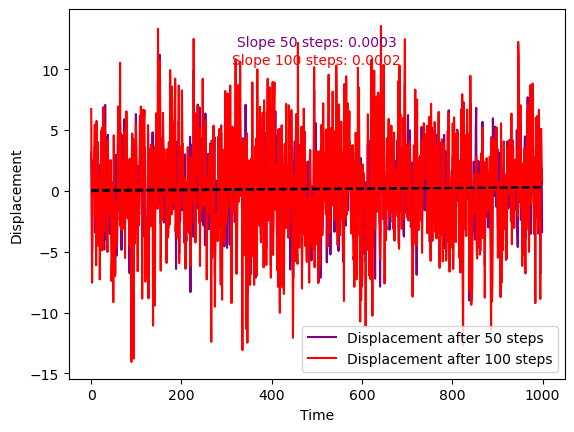

In [135]:
num_iterations_continuous = 1000
displacements_at_50 = []
displacements_at_100 = []
N=100

D = 100 #um^2/s
dt = 0.001 #second

sigma = np.sqrt(2*D*dt)

for iteration in range(num_iterations_continuous):
    x = 0  #Reset the starting position for each iteration
    current_step = 0
    position_displaced = []

    while current_step < N:
        position_displaced.append(x)
        
        displacement = np.random.normal(0,sigma)

        x += displacement

        current_step += 1

    displacements_at_50.append(position_displaced[49]) 
    displacements_at_100.append(position_displaced[99]) 


print("Displacement after 50 steps for the first 5 iterations:", displacements_at_50[:5])
print("Displacement after 100 steps for the first 5 iterations:", displacements_at_100[:5])

Mean_displacement50_continuous = np.average(displacements_at_50)
MD50_squared_continuous = Mean_displacement50_continuous ** 2
print(MD50_squared_continuous)

Mean_displacement100_continuous = np.average(displacements_at_100)
MD100_squared_continuous = Mean_displacement100_continuous ** 2
print(MD100_squared_continuous)

plt.plot(displacements_at_50, label = 'Displacement after 50 steps', color = 'purple')
plt.plot(displacements_at_100, label = 'Displacement after 100 steps', color='red')

plt.plot(range(num_iterations_continuous), slope_50 * np.array(range(num_iterations_continuous)) + intercept_50, '--', color='black')

plt.plot(range(num_iterations_continuous), slope_100 * np.array(range(num_iterations_continuous)) + intercept_100, '--', color='black')

slope_50, intercept_50 = np.polyfit(range(num_iterations_continuous), displacements_at_50, 1)
slope_100, intercept_100 = np.polyfit(range(num_iterations_continuous), displacements_at_100, 1)

plt.annotate(f'Slope 50 steps: {slope_50:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', color='purple')
plt.annotate(f'Slope 100 steps: {slope_100:.4f}', xy=(0.5, 0.85), xycoords='axes fraction', ha='center', color='red')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.show()

### d) Simulate a 2D continuous random walk

Displacement (x) after 50 steps for the first 5 iterations: [-2.016319251936337, 3.9810291179362443, -2.9071818571665027, 2.896132020298952, 1.489179206880378]
Displacement (y) after 50 steps for the first 5 iterations: [1.2119734817603396, -1.2508358661509011, 1.5847830717237237, 1.7074698758590712, 0.6817913270898337]
Displacement (x) after 100 steps for the first 5 iterations: [-3.876749168459422, 8.269760613059795, -2.189458631495226, -0.08681876711333317, 4.439771577671553]
Displacement (y) after 100 steps for the first 5 iterations: [8.134397602483453, 0.8828799056391168, 6.177760011386949, -6.713793553630277, 7.6358901145931615]


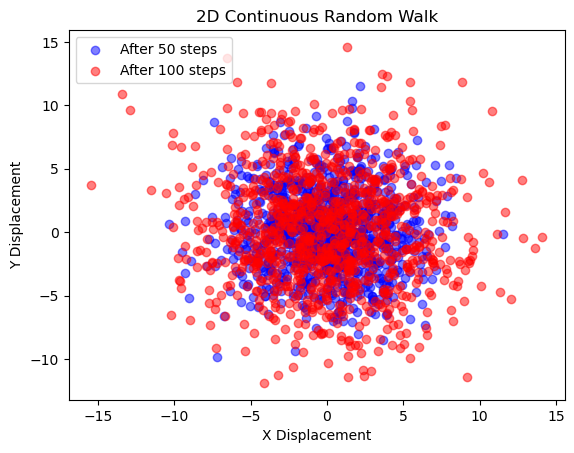

In [146]:
# Starting particle off at x=0, and a lattice where a=1
x = 0

# Probability of moves
D = 100 #um^2/s
dt = 0.001 #second

sigma = np.sqrt(2*D*dt)

N = 100

num_iterations_continuous = 1000
displacements_at_50_x = []
displacements_at_50_y = []
displacements_at_100_x = []
displacements_at_100_y = []

for iteration in range(num_iterations_continuous):
    x = 0  #Reset the starting position for each iteration
    y = 0
    current_step = 0
    position_displaced_x = []
    position_displaced_y = []

    while current_step < N:
        position_displaced_x.append(x)
        position_displaced_y.append(y)
        
        displacement_x = np.random.normal(0,sigma)
        displacement_y = np.random.normal(0,sigma)

        x += displacement_x
        y += displacement_y

        current_step += 1

    displacements_at_50_x.append(position_displaced_x[49])
    displacements_at_50_y.append(position_displaced_y[49])
    displacements_at_100_x.append(position_displaced_x[99])
    displacements_at_100_y.append(position_displaced_y[99]) 


print("Displacement (x) after 50 steps for the first 5 iterations:", displacements_at_50_x[:5])
print("Displacement (y) after 50 steps for the first 5 iterations:", displacements_at_50_y[:5])
print("Displacement (x) after 100 steps for the first 5 iterations:", displacements_at_100_x[:5])
print("Displacement (y) after 100 steps for the first 5 iterations:", displacements_at_100_y[:5])

plt.scatter(displacements_at_50_x, displacements_at_50_y, label='After 50 steps', color='blue', alpha=0.5)

plt.scatter(displacements_at_100_x, displacements_at_100_y, label='After 100 steps', color='red', alpha=0.5)

plt.xlabel('X Displacement')
plt.ylabel('Y Displacement')
plt.title('2D Continuous Random Walk')
plt.legend()
plt.show()

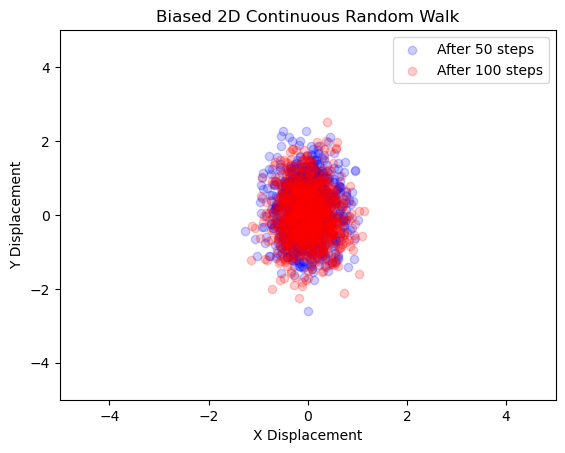

In [156]:
D = 10  # um^2/s
dt = 0.001  # s
kT = 1  # Boltzmann constant times temperature

sigma = np.sqrt(2 * D * dt)

x = 1
y = 1

N = 1000

num_iterations_biased = 1000
displacements_at_50_x = []
displacements_at_50_y = []
displacements_at_100_x = []
displacements_at_100_y = []

# External potential function
def V(x, y):
    return 4 * x**2 + y**2

# Partial derivatives of the external potential
def dV_dx(x, y):
    return 8 * x

def dV_dy(x, y):
    return 2 * y

for iteration in range(num_iterations_biased):
    x = 1  # Reset the starting position for each iteration
    y = 1
    current_step = 0
    position_displaced_x = []
    position_displaced_y = []

    while current_step < N:
        position_displaced_x.append(x)
        position_displaced_y.append(y)

        # Sample from a normal distribution for the displacement
        displacement_x = np.random.normal(0, sigma)
        displacement_y = np.random.normal(0, sigma)

        # Update positions subject to bias
        x += displacement_x - dt * D / kT * dV_dx(x, y)
        y += displacement_y - dt * D / kT * dV_dy(x, y)

        current_step += 1

    displacements_at_50_x.append(position_displaced_x[99])
    displacements_at_50_y.append(position_displaced_y[99])
    displacements_at_100_x.append(position_displaced_x[999])
    displacements_at_100_y.append(position_displaced_y[999]) 

# Plot the corresponding x, y positions after 50 and 100 steps
plt.scatter(displacements_at_50_x, displacements_at_50_y, label='After 50 steps', color='blue', alpha=0.2)

plt.scatter(displacements_at_100_x, displacements_at_100_y, label='After 100 steps', color='red', alpha=0.2)

plt.xlabel('X Displacement')
plt.ylabel('Y Displacement')
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.title('Biased 2D Continuous Random Walk')
plt.legend()
plt.show()